In [1]:
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [2]:
# data
confirmed_cases = np.loadtxt('../data/confirmed_cases.dat')
recovered_cases = np.loadtxt('../data/recovered_cases.dat')
death_cases = np.loadtxt('../data/death_cases.dat')

# 1st wave
epidemics_start_date = dt.datetime(2020, 2, 26)

In [3]:
def plot_data(epidemics_start_date, confirmed_cases, recovered_cases, death_cases):
    """Plot time series data.
    
    Parameters
    ----------
    epidemics_start_date : datetime.datetime
    
    confirmed_cases : numpy.ndarray
        Time series of the total number of infected individuals.
    
    recovered_cases : numpy.ndarray
        Time series of the total number of recovered individuals.
        
    death_cases : numpy.ndarray
        Time series of the total number of death cases.
    
    """
    removed_cases = recovered_cases + death_cases
    active_cases = confirmed_cases - removed_cases
    epidemics_end_date = epidemics_start_date + dt.timedelta(confirmed_cases.size)
    days = mdates.drange(epidemics_start_date, epidemics_end_date, dt.timedelta(days=1))
    fig = plt.figure(figsize=(12, 12))
    axs = fig.subplots(nrows=3, ncols=1, sharex=True, squeeze=True)
    axs[0].plot(days, confirmed_cases, 'o-', label='Total confirmed cases')
    axs[0].plot(days, recovered_cases, 'o-', label='Total recovered cases')
    axs[0].legend()
    axs[0].grid()
    axs[0].set_ylabel('$N$')
    
    axs[1].plot(days, death_cases, 'o-', label='Death cases')
    axs[1].legend()
    axs[1].grid()
    axs[1].set_ylabel('$N$')
    
    axs[2].plot(days, active_cases, 'o-', label='Current active cases')
    axs[2].legend()
    axs[2].grid()
    axs[2].set_ylabel('$N$')
   
    _ = fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    _ = fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    _ = plt.gcf().autofmt_xdate()
    
    plt.show()

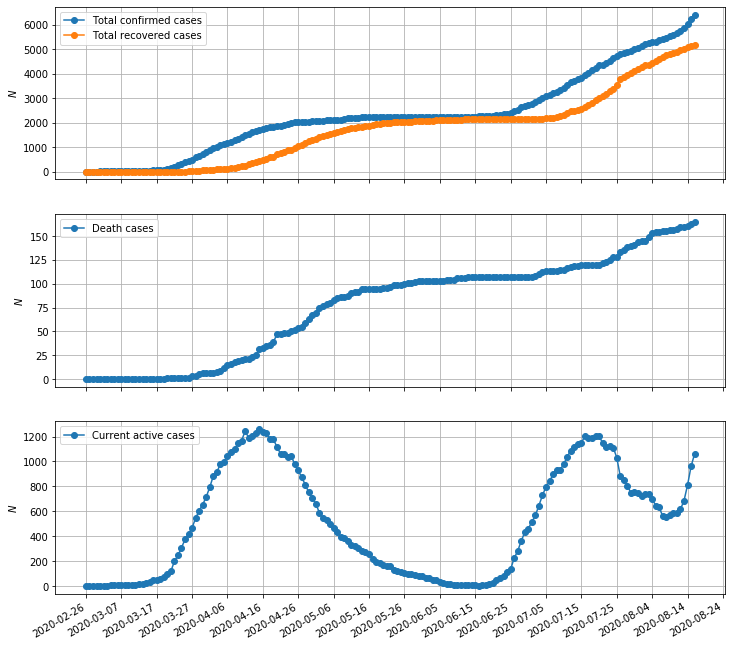

In [4]:
plot_data(
    epidemics_start_date, 
    confirmed_cases, 
    recovered_cases, 
    death_cases,
)